## **Import** MNIST dataset

In [1]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [2]:
    import numpy as np
    
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Data Augmentation
The technique of artifically growing the training set is called **Data Augmentation**

In [6]:
from scipy.ndimage.interpolation import shift

In [11]:
def shift_image(image, dx, dy):
    image = image.reshape(28,28)
    shifted_image = shift(image, [dy,dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [15]:
image = X_train[1200]
shifted_image_down = shift_image(image,0,5)
shifted_image_left = shift_image(image,-5,0)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

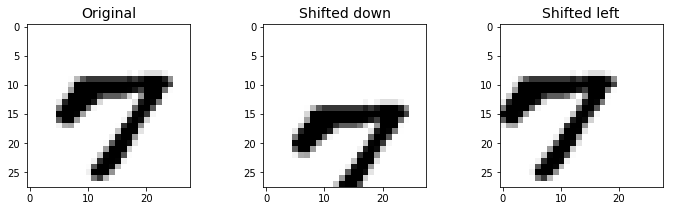

In [16]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize = 14)
plt.imshow(image.reshape(28,28), interpolation="nearest",cmap="Greys")

plt.subplot(132)
plt.title("Shifted down", fontsize = 14)
plt.imshow(shifted_image_down.reshape(28,28), interpolation="nearest",cmap="Greys")

plt.subplot(133)
plt.title("Shifted left", fontsize = 14)
plt.imshow(shifted_image_left.reshape(28,28), interpolation="nearest",cmap="Greys")

plt.show()

In [17]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [image for image in y_train]

for dx,dy in ((1,0),(-1,0),(0,1),(0,-1)):
    for image,label in zip(X_train,y_train):
        X_train_augmented.append(shift_image(image,dx,dy))
        y_train_augmented.append(label)
        
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [19]:
shuffle_index = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_index]
y_train_augmented = y_train_augmented[shuffle_index]

In [20]:
print(X_train_augmented.shape, y_train_augmented.shape)

(300000, 784) (300000,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_